<a href="https://colab.research.google.com/github/vani-3883/Vanisha/blob/master/Loan_Prediction_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('trainingData.csv')

In [3]:
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
social_class,5255,0.131375
water_availabity,5253,0.131325
secondary_business,5241,0.131025
city,1864,0.046600
type_of_house,694,0.017350
home_ownership,379,0.009475
sanitary_availability,208,0.005200
monthly_expenses,120,0.003000
loan_purpose,26,0.000650
primary_business,26,0.000650


In [6]:

data['social_class'] = data['social_class'].fillna( 
                               data['social_class'].dropna().mode().values[0] )
data['water_availabity'] = data['water_availabity'].fillna( 
                               data['water_availabity'].dropna().mode().values[0] )
data['secondary_business'] = data['secondary_business'].fillna( 
                               data['secondary_business'].dropna().mode().values[0] )
data['city'] = data['city'].fillna( 
                               data['city'].dropna().mode().values[0] )
data['home_ownership'] = data['home_ownership'].fillna( 
                               data['home_ownership'].dropna().mode().values[0] )
data['type_of_house'] = data['type_of_house'].fillna( 
                               data['type_of_house'].dropna().mode().values[0] )
data['sanitary_availability'] = data['sanitary_availability'].fillna( 
                               data['sanitary_availability'].dropna().mode().values[0] )
data['monthly_expenses'] = data['monthly_expenses'].fillna( 
                               data['monthly_expenses'].dropna().mean() )
data['loan_purpose'] = data['loan_purpose'].fillna( 
                               data['loan_purpose'].dropna().mode().values[0] )
data['primary_business'] = data['primary_business'].fillna(
                               data['primary_business'].dropna().mode().values[0] )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


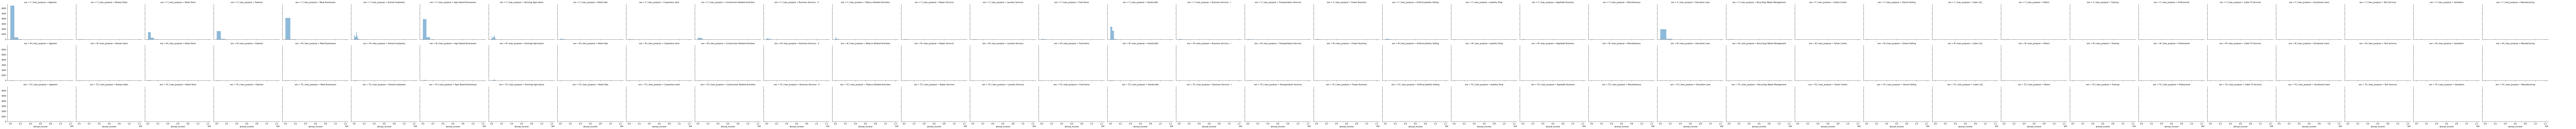

In [7]:
grid = sns.FacetGrid(data, row='sex', col='loan_purpose', size=3.2, aspect=1.6)
grid.map(plt.hist, 'annual_income', alpha=.5, bins=10)
grid.add_legend()

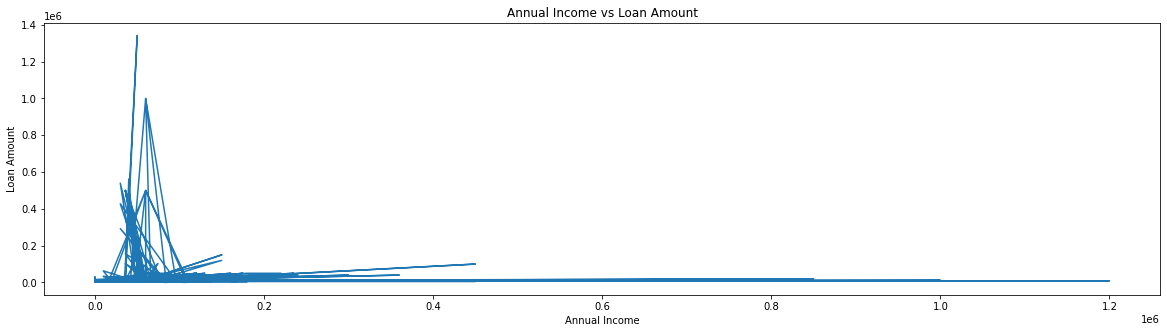

In [9]:
plt.figure(figsize = (20, 5))
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.plot(data['annual_income'], data['loan_amount'])
plt.show()

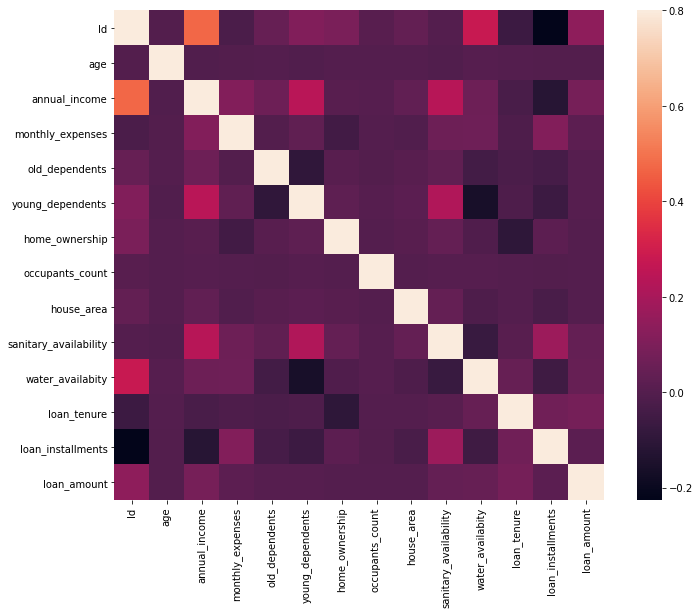

In [10]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [11]:
print(data.describe())

                Id           age  ...  loan_installments   loan_amount
count  40000.00000   40000.00000  ...       40000.000000  4.000000e+04
mean   20000.50000      55.15990  ...          21.761175  8.412593e+03
std    11547.14972    3830.35566  ...          16.682458  1.359694e+04
min        1.00000       2.00000  ...           0.000000  1.000000e+02
25%    10000.75000      29.00000  ...          12.000000  5.000000e+03
50%    20000.50000      35.00000  ...          12.000000  8.000000e+03
75%    30000.25000      42.00000  ...          50.000000  1.000000e+04
max    40000.00000  766105.00000  ...          84.000000  1.343000e+06

[8 rows x 14 columns]


In [14]:
data[['loan_purpose', 'annual_income']].groupby(['loan_purpose'],
                                               as_index = False).mean().sort_values(by = 'loan_purpose', ascending = False)

,loan_purpose,annual_income
36,Vocational Loans,25000.000000
35,Utensil Selling,20109.615385
34,Tuition Centre,74000.000000
33,Transportation Services,44981.224490
32,Training,50782.608696
31,Tobacco Related Activities,23710.902696
30,Tent Services,63000.000000
29,Sanitation,86356.435644
28,Retail Store,33315.282731
27,Retail Sale,29509.771987


In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   40000 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           40000 non-null  object 
 5   primary_business       40000 non-null  object 
 6   secondary_business     40000 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       40000 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         40000 non-null  float64
 12  type_of_house          40000 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [25]:
dataset_correlation = data.drop(['Id', 'city', 'age','social_class', 'primary_business','secondary_business',\
                                   'occupants_count', 'home_ownership','loan_purpose'], axis = 1 )
dataset_correlation.head()

,sex,annual_income,monthly_expenses,old_dependents,young_dependents,type_of_house,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
0,F,36000.0,5000.0,0,2,R,70.0,1.0,0.5,12,12,5000.0
1,F,94000.0,3600.0,1,1,T1,80.0,1.0,0.5,12,50,7500.0
2,M,48000.0,4000.0,0,2,T1,50.0,1.0,0.5,12,12,5000.0
3,F,7000.0,5000.0,0,2,T1,50.0,1.0,0.5,12,50,7500.0
4,F,36000.0,3500.0,0,0,T1,112.0,1.0,0.5,12,12,5000.0


In [26]:
dataset_correlation.isnull().sum()


sex                      0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
type_of_house            0
house_area               0
sanitary_availability    0
water_availabity         0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

In [27]:
dataset_correlation.dtypes

sex                       object
annual_income            float64
monthly_expenses         float64
old_dependents             int64
young_dependents           int64
type_of_house             object
house_area               float64
sanitary_availability    float64
water_availabity         float64
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

In [28]:
dataset_correlation.old_dependents = dataset_correlation.old_dependents.astype('object')
dataset_correlation.young_dependents = dataset_correlation.young_dependents.astype('object')
dataset_correlation.sanitary_availability = dataset_correlation.sanitary_availability.astype('object')
dataset_correlation.water_availabity = dataset_correlation.water_availabity.astype('object')

In [29]:
dataset_correlation.dtypes

sex                       object
annual_income            float64
monthly_expenses         float64
old_dependents            object
young_dependents          object
type_of_house             object
house_area               float64
sanitary_availability     object
water_availabity          object
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

In [30]:
dataset_prep = pd.get_dummies(dataset_correlation, drop_first = True)

In [31]:
dataset_prep.head()


,annual_income,monthly_expenses,house_area,loan_tenure,loan_installments,loan_amount,sex_M,sex_TG,old_dependents_1,old_dependents_2,old_dependents_3,young_dependents_1,young_dependents_2,young_dependents_3,young_dependents_4,young_dependents_5,young_dependents_6,young_dependents_7,type_of_house_T1,type_of_house_T2,sanitary_availability_0.0,sanitary_availability_1.0,water_availabity_0.0,water_availabity_0.5,water_availabity_1.0
0,36000.0,5000.0,70.0,12,12,5000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,94000.0,3600.0,80.0,12,50,7500.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,48000.0,4000.0,50.0,12,12,5000.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
3,7000.0,5000.0,50.0,12,50,7500.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
4,36000.0,3500.0,112.0,12,12,5000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [32]:
correlation = dataset_prep.corr()
correlation

,annual_income,monthly_expenses,house_area,loan_tenure,loan_installments,loan_amount,sex_M,sex_TG,old_dependents_1,old_dependents_2,old_dependents_3,young_dependents_1,young_dependents_2,young_dependents_3,young_dependents_4,young_dependents_5,young_dependents_6,young_dependents_7,type_of_house_T1,type_of_house_T2,sanitary_availability_0.0,sanitary_availability_1.0,water_availabity_0.0,water_availabity_0.5,water_availabity_1.0
annual_income,1.000000,0.112208,0.033902,-0.027618,-0.119936,0.085632,0.075923,0.004532,0.059477,0.020062,0.007892,0.071343,0.124190,0.102822,0.045404,0.022112,0.013192,0.012478,-0.041111,-0.027591,-0.235560,0.235558,0.005179,-0.062564,0.061770
monthly_expenses,0.112208,1.000000,-0.008270,-0.013020,0.113830,0.019568,-0.010692,0.000587,-0.006778,0.004296,0.002932,-0.006233,0.033681,-0.000583,0.001731,0.008896,0.003276,0.002866,0.024414,-0.073126,-0.059509,0.059529,-0.011183,-0.061619,0.063072
house_area,0.033902,-0.008270,1.000000,0.001177,-0.027506,0.002874,0.005337,0.205265,0.011169,0.002320,-0.000057,0.019362,0.012665,-0.000128,-0.000302,-0.000944,-0.000497,-0.000385,-0.011400,0.008366,-0.040306,0.040297,0.000918,0.013945,-0.014058
loan_tenure,-0.027618,-0.013020,0.001177,1.000000,0.067601,0.082230,0.085287,-0.000312,-0.027884,0.006542,-0.022057,-0.010401,-0.008016,-0.006563,-0.001181,0.003511,-0.000514,-0.000236,-0.049913,0.016204,-0.007581,0.007582,0.004926,-0.045931,0.045194
loan_installments,-0.119936,0.113830,-0.027506,0.067601,1.000000,0.015981,-0.065942,-0.000264,-0.031170,-0.013053,-0.004724,0.024114,0.030222,-0.093437,-0.047482,-0.022346,-0.012755,-0.000157,0.352487,-0.341349,-0.173677,0.173705,-0.035640,0.066708,-0.061728
loan_amount,0.085632,0.019568,0.002874,0.082230,0.015981,1.000000,0.010864,0.000572,0.003318,0.008309,-0.000887,0.003000,0.011530,-0.001217,-0.007299,-0.003071,0.002081,0.000340,-0.013171,-0.014027,-0.041575,0.041575,0.003658,-0.047833,0.047267
sex_M,0.075923,-0.010692,0.005337,0.085287,-0.065942,0.010864,1.000000,-0.003321,0.095952,0.052335,-0.001255,0.002928,-0.016374,-0.008027,0.004499,-0.009686,-0.000613,-0.002510,-0.002092,-0.035514,-0.057046,0.057058,-0.015398,-0.027193,0.029263
sex_TG,0.004532,0.000587,0.205265,-0.000312,-0.000264,0.000572,-0.003321,1.000000,-0.002650,-0.000741,-0.000066,0.005611,0.000033,0.002952,-0.001660,-0.000628,-0.000288,-0.000132,0.001399,-0.004632,-0.004829,0.004829,-0.000894,0.000242,-0.000119
old_dependents_1,0.059477,-0.006778,0.011169,-0.027884,-0.031170,0.003318,0.095952,-0.002650,1.000000,-0.011215,-0.001002,-0.018227,-0.063909,-0.034167,-0.014625,-0.006772,-0.004367,-0.002003,0.018701,-0.020870,-0.032599,0.032609,0.011534,0.036732,-0.038239
old_dependents_2,0.020062,0.004296,0.002320,0.006542,-0.013053,0.008309,0.052335,-0.000741,-0.011215,1.000000,-0.000280,-0.009091,-0.014468,-0.005258,-0.003399,0.006795,-0.001221,-0.000560,-0.005695,0.012107,-0.000961,0.000964,-0.003785,0.018658,-0.018112


In [33]:
X = dataset_prep.drop(['loan_amount'], axis = 1)
Y = dataset_prep[['loan_amount']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
print(ypred)

[5000. 5000. 8000. ... 5000. 8000. 5000.]


In [42]:
from sklearn.metrics import f1_score

In [45]:
f1_score(y_test, ypred, average='weighted')

0.2607442660438643

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree=DecisionTreeClassifier()

In [48]:
tree.fit(X_train, y_train)
ypred_tree=tree.predict(X_test)
print(ypred_tree)

[ 5000.  3000.  5000. ...  5000. 12000.  7500.]


In [49]:
f1_score(y_test, ypred_tree, average='weighted')

0.5558254629933796